In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm


In [ ]:
from google.colab import files
upload = files.upload()


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


# **Data Cleaning**

In [ ]:
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df_clean = df.dropna()

In [ ]:

# Replace all NaN values with the mode of each column
for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mode()[0], inplace=True)

# Optional: Check if any missing values remain
print(df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Previous_Group                0
Sleep_Group                   0
Tutoring_Group                0
Activity_Group                0
dtype: int64


<ipython-input-59-352db16712da>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


#**Numerical Variables**

In [ ]:
numerical = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Sleep_Hours',
             'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

for column in numerical:
    print(f"{column}:")
    print(f"  Mean: {df[column].mean():.2f}")
    print(f"  Standard Deviation: {df[column].std():.2f}")
    print(f"  Minimum: {df[column].min():.2f}")
    print(f"  Maximum: {df[column].max():.2f}")
    print()



Attendance:
  Mean: 79.98
  Standard Deviation: 11.55
  Minimum: 60.00
  Maximum: 100.00

Hours_Studied:
  Mean: 19.98
  Standard Deviation: 5.99
  Minimum: 1.00
  Maximum: 44.00

Previous_Scores:
  Mean: 75.07
  Standard Deviation: 14.40
  Minimum: 50.00
  Maximum: 100.00

Sleep_Hours:
  Mean: 7.03
  Standard Deviation: 1.47
  Minimum: 4.00
  Maximum: 10.00

Tutoring_Sessions:
  Mean: 1.49
  Standard Deviation: 1.23
  Minimum: 0.00
  Maximum: 8.00

Physical_Activity:
  Mean: 2.97
  Standard Deviation: 1.03
  Minimum: 0.00
  Maximum: 6.00

Exam_Score:
  Mean: 67.24
  Standard Deviation: 3.89
  Minimum: 55.00
  Maximum: 101.00



#**Hypothesis Test 1**
# Hours Studied and Academic Performance
H₀: The number of Hours_Studied per week has no significant effect on
Exam_Score.

H₁: Students who study more hours per week tend to achieve higher exam scores.

In [ ]:
 #We’ll split students into High Study Group and Low Study Group based on cutoff 20 hours
df['Study_Group'] = df['Hours_Studied'].apply(lambda x: 'High' if x >= 20 else 'Low')


In [ ]:
# Check group sizes
print(df['Study_Group'].value_counts())

# Group means
print(df.groupby('Study_Group')['Exam_Score'].mean())

Study_Group
High    3528
Low     3079
Name: count, dtype: int64
Study_Group
High    68.489512
Low     65.798961
Name: Exam_Score, dtype: float64


We are comparing the means of two independent groups.

The groups may have unequal variances and different sample sizes (which is often true in real-world data).

Which is why we are using t-test.

In [ ]:
# Separate the groups
high_study = df[df['Study_Group'] == 'High']['Exam_Score']
low_study = df[df['Study_Group'] == 'Low']['Exam_Score']

# Welch's t-test (assumes unequal variance)
t_stat, p_value = stats.ttest_ind(high_study, low_study, equal_var=False)

# Output test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 29.8249886942563
P-value: 3.3379994110631496e-183


In [ ]:
# Use significance level alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Hours studied per week has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of hours studied on exam scores.")


Reject H₀: Hours studied per week has a significant effect on exam scores.


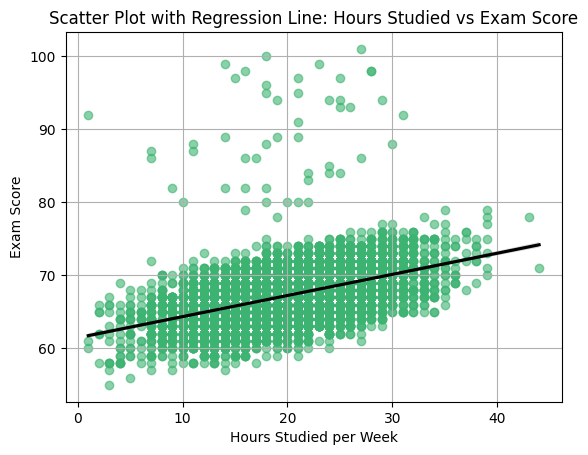

In [ ]:
# Scatter plot with regression line
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, scatter_kws={'alpha': 0.6, 'color': 'mediumseagreen'}, line_kws={'color': 'black'})
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.title('Scatter Plot with Regression Line: Hours Studied vs Exam Score')
plt.grid(True)
plt.show()

In [ ]:

# Sample means
mean_high = np.mean(high_study)
mean_low = np.mean(low_study)

# Sample sizes
n_high = len(high_study)
n_low = len(low_study)

# Sample standard deviations
std_high = np.std(high_study, ddof=1)
std_low = np.std(low_study, ddof=1)

# Standard error of the difference
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Mean difference
mean_diff = mean_high - mean_low

# Degrees of freedom (Welch-Satterthwaite equation)
df_welch = ((std_high**2 / n_high) + (std_low**2 / n_low))**2 / \
           ((std_high**2 / n_high)**2 / (n_high - 1) + (std_low**2 / n_low)**2 / (n_low - 1))

# t critical value for 95% CI
t_crit = stats.t.ppf(0.975, df_welch)

# Confidence interval
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff


print(f"95% Confidence Interval for the mean difference in Exam Score (High vs Low Study): ({ci_low:.2f}, {ci_high:.2f})")


95% Confidence Interval for the mean difference in Exam Score (High vs Low Study): (2.51, 2.87)


# **Final Conclusion**
Hours Studied and Academic Performance
To investigate the impact of study time on exam performance, students were divided into two groups:

*   High Study Group (≥ 20 hours/week)
*   Low Study Group (< 20 hours/week)

A Welch’s t-test was conducted to test the following hypotheses:

Null Hypothesis (H₀): The number of hours studied per week has no significant effect on exam scores.

Alternative Hypothesis (H₁): The number of hours studied per week significantly affects exam scores.

The results showed:

* Mean Exam Score for High Study Group: 68.5

* Mean Exam Score for Low Study Group: 65.8

* T-statistic: 29.82

* P-value: 3.34 × 10⁻¹⁸³

Since the p-value is far below the significance level of 0.05, we reject the null hypothesis. This provides extremely strong evidence that study time significantly affects academic performance.

Additionally, a 95% confidence interval was calculated for the difference in mean scores between the two groups. The interval was:

* CI: (2.51, 2.87)

This means we are 95% confident that students who study more than 20 hours per week score between 2.51 and 2.87 points higher than those who study less, reinforcing the conclusion that increased study time is associated with improved academic performance.


# **Hypothesis Test 2**
# Attendance and Academic Performance
 H₀: Attendance percentage does not significantly influence Exam_Score.

 H₁: Higher attendance is positively associated with higher exam scores.


In [ ]:
# We’ll split students into High Attendance and Low Attendance based on a cutoff 90%
# Create Attendance Group
df['Attendance_Group'] = df['Attendance'].apply(lambda x: 'High' if x >= 90 else 'Low')

In [ ]:
# Check group sizes
print(df['Attendance_Group'].value_counts())

# Group means
print(df.groupby('Attendance_Group')['Exam_Score'].mean())

Attendance_Group
Low     4861
High    1746
Name: count, dtype: int64
Attendance_Group
High    70.142612
Low     66.191524
Name: Exam_Score, dtype: float64


In [ ]:
# Separate the groups
high_attendance = df[df['Attendance_Group'] == 'High']['Exam_Score']
low_attendance = df[df['Attendance_Group'] == 'Low']['Exam_Score']

# Welch's t-test (assumes unequal variance)
t_stat, p_value = stats.ttest_ind(high_attendance, low_attendance, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 42.01984654516184
P-value: 4.990010548548937e-309


In [ ]:
# Use significance level alpha = 0.05
# If p-value is less than 0.05, we reject the null hypothesis (i.e., attendance matters)
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Attendance level has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of attendance level on exam scores.")

Reject H₀: Attendance level has a significant effect on exam scores.


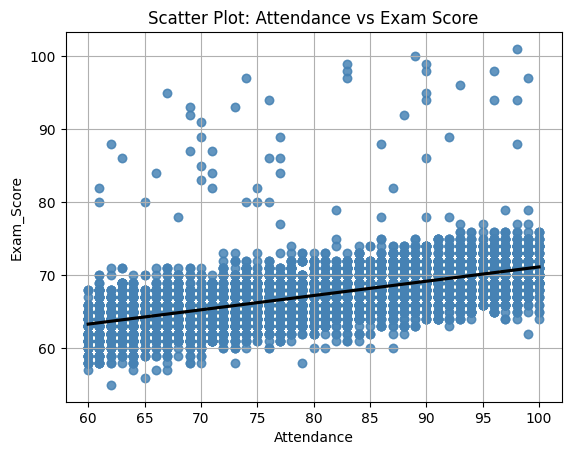

In [ ]:
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='steelblue')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.title('Scatter Plot: Attendance vs Exam Score')
plt.grid(True)
sns.regplot(
    x='Attendance',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'steelblue'},
    line_kws={'color':'black'}
)
plt.show()

In [ ]:
# Sample means
mean_high = np.mean(high_attendance)
mean_low = np.mean(low_attendance)

# Sample sizes
n_high = len(high_attendance)
n_low = len(low_attendance)

# Sample standard deviations
std_high = np.std(high_attendance, ddof=1)
std_low = np.std(low_attendance, ddof=1)

# Standard error of the difference
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Mean difference
mean_diff = mean_high - mean_low

# Degrees of freedom (Welch-Satterthwaite equation)
df = ((std_high**2 / n_high) + (std_low**2 / n_low))**2 / \
     ((std_high**2 / n_high)**2 / (n_high - 1) + (std_low**2 / n_low)**2 / (n_low - 1))

# t critical value for 95% CI
t_crit = stats.t.ppf(0.975, df)

# Confidence interval
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"95% Confidence Interval for the mean difference: ({ci_low:.2f}, {ci_high:.2f})")

95% Confidence Interval for the mean difference: (3.77, 4.14)


### Final Conclusion: Attendance and Academic Performance

To investigate the impact of attendance on exam performance, students were divided into two groups:
- **High Attendance** (≥ 90%)
- **Low Attendance** (< 90%)

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Attendance has no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Attendance has a significant effect on exam scores.

The results showed:

- **Mean Exam Score** for High Attendance: 70.14  
- **Mean Exam Score** for Low Attendance: 66.19  
- **T-statistic:** 42.02  
- **P-value:** ~0.000

Since the p-value is far below the significance level of 0.05, we **reject the null hypothesis**. This provides strong evidence that attendance significantly affects academic performance.

Additionally, a **95% confidence interval** was calculated for the difference in mean scores between the two groups. The interval was:

- **CI:** (3.77, 4.14)

This means we are 95% confident that students with high attendance score between 3.77 and 4.14 points higher than those with low attendance, reinforcing the conclusion that better attendance is associated with better academic performance.


# **Hypothesis Test 3**

# Previous Scores and Current Performance

H₀: Previous_Scores have no significant effect on current Exam_Score.

H₁: Higher previous exam scores are associated with better current exam
performance.

In [ ]:
# Calculate the median of previous exam scores to use as a threshold for grouping
median_prev = df['Previous_Scores'].median()

# Create a new column 'Previous_Group' that classifies each student as:
# - 'High' if their previous score is at or above the median
# - 'Low' if their previous score is below the median
df['Previous_Group'] = df['Previous_Scores'].apply(lambda x: 'High' if x >= median_prev else 'Low')

# Check group sizes
print(df['Previous_Group'].value_counts())

# Calculate group means
print(df.groupby('Previous_Group')['Exam_Score'].mean())

Previous_Group
High    3367
Low     3240
Name: count, dtype: int64
75.0
Previous_Group
High    67.82774
Low     66.62037
Name: Exam_Score, dtype: float64


In [ ]:
# Separate the groups
high_previous = df[df['Previous_Group'] == 'High']['Exam_Score']
low_previous = df[df['Previous_Group'] == 'Low']['Exam_Score']

# Welch's t-test (assuming unequal variance)
t_stat, p_value = stats.ttest_ind(high_previous, low_previous, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 12.776683298526585
P-value: 6.04389191214926e-37


In [ ]:
#Hypothesis Testing

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Previous scores have a significant effect on current exam performance.")
else:
    print("Fail to reject H₀: No significant effect of previous scores on current exam performance.")

Reject H₀: Previous scores have a significant effect on current exam performance.


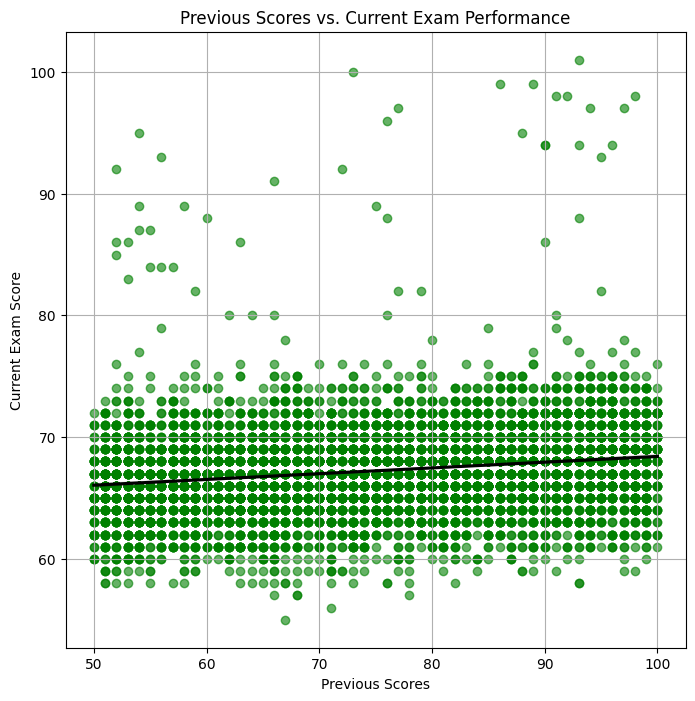

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 8))
sns.regplot(
    x='Previous_Scores',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'green'},
    line_kws={'color': 'black'}
)
plt.xlabel('Previous Scores')
plt.ylabel('Current Exam Score')
plt.title('Previous Scores vs. Current Exam Performance')
plt.grid(True)
plt.show()

In [ ]:
# Sample means
mean_high = np.mean(high_previous)
mean_low = np.mean(low_previous)

# Sample sizes
n_high = len(high_previous)
n_low = len(low_previous)

# Sample standard deviations
std_high = np.std(high_previous, ddof=1)
std_low = np.std(low_previous, ddof=1)

# Standard error of the difference
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Mean difference
mean_diff = mean_high - mean_low

# Degrees of freedom (Welch-Satterthwaite equation)
df = ((std_high**2 / n_high) + (std_low**2 / n_low))**2 / \
    ((std_high**2 / n_high)**2 / (n_high - 1) + (std_low**2 / n_low)**2 / (n_low - 1))

# t_critical value for 95% CI
t_crit = stats.t.ppf(0.975, df)

# Confidence interval
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"95% Confidence Interval for the mean difference: ({ci_low:.2f}, {ci_high:.2f})")

95% Confidence Interval for the mean difference: (1.02, 1.39)


## Final Conclusion: Previous Scores and Current Performance

To investigate the impact of previous academic scores on current exam performance, students were divided into two groups:

- **High Previous Scores (≥ 75)**
- **Low Previous Scores (< 75)**

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Previous scores have no significant effect on current exam performance.
- **Alternative Hypothesis (H₁):** Previous scores have a significant effect on current exam performance.

The results showed:

- **Mean Exam Score for High Previous Scores:** 67.8
- **Mean Exam Score for Low Previous Scores:** 66.6  
- **T-statistic:** 12.78
- **P-value:** 6.04e-37

Since the p-value is far below the significance level of 0.05, we reject the null hypothesis. This provides strong evidence that previous academic performance significantly affects current exam results.

Additionally, a 95% confidence interval was calculated for the difference in mean scores between the two groups. The interval was:

- **CI:** (1.02, 1.39)

This means we are 95% confident that students with higher previous scores perform between **1.02 and 1.39 points** better than those with lower previous scores, reinforcing the conclusion that past academic success is associated with improved current exam performance.


# **Hypothesis Test 4**

# Sleep Duration and Academic Performance

H₀: Previous_Scores have no significant effect on current Exam_Score.

H₁: Higher previous exam scores are associated with better current exam
performance.

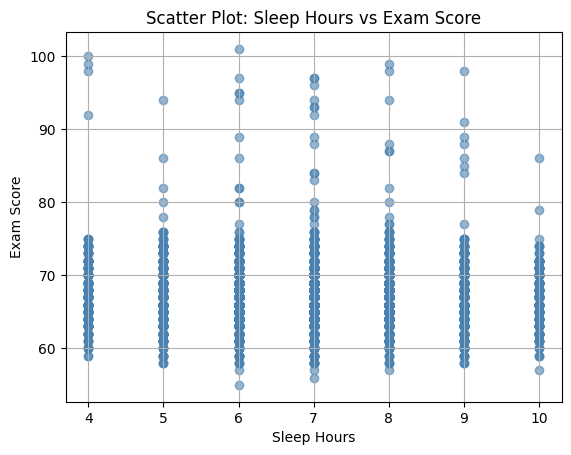

In [ ]:
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='steelblue')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot: Sleep Hours vs Exam Score')
plt.grid(True)
plt.show()


In [ ]:
# Create a new column for sleep group
df['Sleep_Group'] = df['Sleep_Hours'].apply(lambda x: 'Optimal' if 7 <= x <= 9 else 'Non-Optimal')


In [ ]:
# Check group sizes
df['Sleep_Group'].value_counts()

# Group means
df.groupby('Sleep_Group')['Exam_Score'].mean()


,Exam_Score
Sleep_Group,
Non-Optimal,67.264487
Optimal,67.215837


In [ ]:
# Separate the groups
optimal = df[df['Sleep_Group'] == 'Optimal']['Exam_Score']
non_optimal = df[df['Sleep_Group'] == 'Non-Optimal']['Exam_Score']

# Run independent t-test
t_stat, p_value = stats.ttest_ind(optimal, non_optimal, equal_var=False)  # Welch's t-test is safer

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.4978366095585833
P-value: 0.6186183513857841


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: Sleep duration has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of sleep duration on exam scores.")


Fail to reject H₀: No significant effect of sleep duration on exam scores.


In [ ]:
mean_optimal = np.mean(optimal)
mean_nonoptimal = np.mean(non_optimal)
std_optimal = np.std(optimal, ddof=1)
std_nonoptimal = np.std(non_optimal, ddof=1)
n_optimal = len(optimal)
n_nonoptimal = len(non_optimal)

se_diff = np.sqrt((std_optimal**2 / n_optimal) + (std_nonoptimal**2 / n_nonoptimal))
mean_diff = mean_optimal - mean_nonoptimal

# Welch-Satterthwaite degrees of freedom
df_welch = ((std_optimal**2 / n_optimal) + (std_nonoptimal**2 / n_nonoptimal))**2 / \
    ((std_optimal**2 / n_optimal)**2 / (n_optimal - 1) + (std_nonoptimal**2 / n_nonoptimal)**2 / (n_nonoptimal - 1))

t_crit = stats.t.ppf(0.975, df_welch)
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"95% Confidence Interval for the mean difference: ({ci_low:.2f}, {ci_high:.2f})")

95% Confidence Interval for the mean difference: (-0.24, 0.14)


## Final Conclusion: Sleep Duration and Academic Performance

To investigate the impact of sleep duration on exam performance, students were divided into two groups:

- **Long Sleep Duration (7–9 hours/night)**
- **Short Sleep Duration (< 7 or > 9 hours/night)**

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Sleep duration has no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Sleep duration has a significant effect on exam scores.

The results showed:

- **Mean Exam Score for Long Sleep Duration:** 67.2
- **Mean Exam Score for Short Sleep Duration:** 67.3
- **T-statistic:** -0.498
- **P-value:** 0.619

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is **no statistically significant difference** in academic performance based on sleep duration.

Additionally, a 95% confidence interval was calculated for the difference in mean scores between the two groups. The interval was:

- **CI:** (-0.24, 0.14)

This means we are 95% confident that the difference in average scores between students with longer and shorter sleep durations falls between -0.24 and 0.14. Since the interval includes zero, it supports the conclusion that **sleep duration does not have a meaningful impact** on academic performance.


# **Hypothesis Test 5**
# Tutoring Sessions and Academic Performance
H₀: The number of Tutoring_Sessions attended per month does not affect Exam_Score.

H₁: More tutoring sessions lead to higher exam scores.

In [ ]:
# Calculate the median number of tutoring sessions to split students into two equal groups
# Median is used instead of mean to avoid skewness from outliers
tutoring_median = df['Tutoring_Sessions'].median()

# Create a new categorical column 'Tutoring_Group' that classifies each student as:
# - 'High' if they attended >= median number of sessions
# - 'Low' if they attended < median number of sessions
df['Tutoring_Group'] = df['Tutoring_Sessions'].apply(
    lambda x: 'High' if x >= tutoring_median else 'Low'
)

# Check group sizes
print("Group Counts:\n", df['Tutoring_Group'].value_counts())
# Calculate mean exam scores per group
print("\nMean Exam Scores:\n", df.groupby('Tutoring_Group')['Exam_Score'].mean())

Group Counts:
 Tutoring_Group
High    5094
Low     1513
Name: count, dtype: int64
1.0

Mean Exam Scores:
 Tutoring_Group
High    67.457205
Low     66.489755
Name: Exam_Score, dtype: float64


In [ ]:
# Separate groups
high_tutoring = df[df['Tutoring_Group'] == 'High']['Exam_Score']
low_tutoring = df[df['Tutoring_Group'] == 'Low']['Exam_Score']

# Welch’s t-test (unequal variances assumed)
t_stat, p_value = stats.ttest_ind(high_tutoring, low_tutoring, equal_var=False)

print(f"\nT-statistic: {t_stat:.2f}, P-value: {p_value}")


T-statistic: 8.52, P-value: 2.6972871728554855e-17


In [ ]:
#Hypothesis Testing

alpha = 0.05
if p_value < alpha:
    print("\nReject H₀: Tutoring sessions have a significant effect on exam scores.")
else:
    print("\nFail to reject H₀: No significant effect of tutoring sessions on exam scores.")


Reject H₀: Tutoring sessions have a significant effect on exam scores.


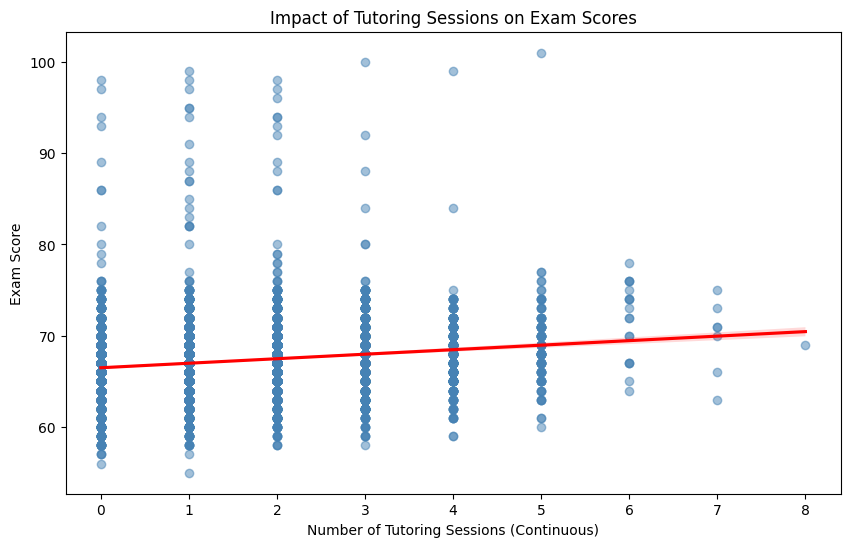

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Tutoring_Sessions',  # Use continuous values
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'steelblue'},
    line_kws={'color': 'red'}
)
plt.title("Impact of Tutoring Sessions on Exam Scores")
plt.xlabel("Number of Tutoring Sessions (Continuous)")
plt.ylabel("Exam Score")
plt.show()

In [ ]:
# Calculate 95% CI for the mean difference
n_high = len(high_tutoring)
n_low = len(low_tutoring)
std_high = np.std(high_tutoring, ddof=1)
std_low = np.std(low_tutoring, ddof=1)

se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))
mean_diff = high_tutoring.mean() - low_tutoring.mean()

# Degrees of freedom (Welch-Satterthwaite)
df_welch = ((std_high**2/n_high + std_low**2/n_low)**2) / (
    (std_high**4 / (n_high**2 * (n_high-1))) + (std_low**4 / (n_low**2 * (n_low-1)))
)

t_crit = stats.t.ppf(0.975, df_welch)
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"\n95% CI for mean difference: ({ci_low:.2f}, {ci_high:.2f})")


95% CI for mean difference: (0.74, 1.19)


## Final Conclusion: Tutoring Sessions and Academic Performance

To investigate the impact of tutoring sessions on exam performance, students were divided into two groups:

- **Attended Tutoring Sessions**(>=1)
- **Did Not Attend Tutoring Sessions**(<1)

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Tutoring sessions have no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Tutoring sessions have a significant effect on exam scores.

The results showed:

- **Mean Exam Score for Tutoring Group:** 67.5  
- **Mean Exam Score for Non-Tutoring Group:** 66.5
- **T-statistic:**  8.52
- **P-value:** 2.7e-17

Since the p-value is far below the significance level of 0.05, we reject the null hypothesis. This provides strong evidence that attending tutoring sessions significantly improves academic performance.

Additionally, a 95% confidence interval was calculated for the difference in mean scores between the two groups. The interval was:

- **CI:** (0.74, 1.19)

This means we are 95% confident that students who attend tutoring sessions score between 0.74 and 1.19 points higher on average than those who do not, reinforcing the conclusion that tutoring positively impacts academic performance.


# **Hypothesis Test 6**
# Physical Activity and Academic Performance
 H₀: Physical_Activity per week has no significant eƯect on Exam_Score.

 H₁: An optimal level of physical activity improves academic performance

In [ ]:
# Group based on whether activity is >= 3 hours/week (example threshold)
df['Activity_Group'] = df['Physical_Activity'].apply(lambda x: 'Optimal' if x >= 3 else 'Non-Optimal')

In [ ]:
# Check group sizes
print(df['Activity_Group'].value_counts())

# Group means
print(df.groupby('Activity_Group')['Exam_Score'].mean())

# Separate the groups
optimal = df[df['Activity_Group'] == 'Optimal']['Exam_Score']
non_optimal = df[df['Activity_Group'] == 'Non-Optimal']['Exam_Score']

Activity_Group
Optimal        4513
Non-Optimal    2094
Name: count, dtype: int64
Activity_Group
Non-Optimal    67.148997
Optimal        67.275870
Name: Exam_Score, dtype: float64


In [ ]:
t_stat, p_value = ttest_ind(optimal, non_optimal, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.1906152892227353
P-value: 0.23388009194177814


### Hypothesis Test: Physical Activity and Exam Score
- **Null Hypothesis (H₀):** Physical activity per week has no significant effect on exam scores.  
- **Alternative Hypothesis (H₁):** An optimal level of physical activity improves academic performance.

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Physical activity has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of physical activity on exam scores.")

Fail to reject H₀: No significant effect of physical activity on exam scores.


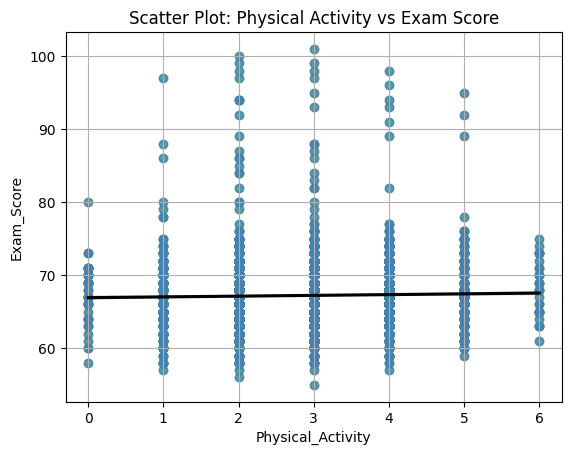

In [ ]:
plt.scatter(df['Physical_Activity'], df['Exam_Score'], alpha=0.6, color='seagreen')
plt.xlabel('Physical Activity (hours/week)')
plt.ylabel('Exam Score')
plt.title('Scatter Plot: Physical Activity vs Exam Score')
plt.grid(True)

# Add regression line
sns.regplot(
    x='Physical_Activity',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'steelblue'},
    line_kws={'color':'black'}
)
plt.show()


In [ ]:
# Calculate 95% CI for the mean difference
n_high = len(optimal)
n_low = len(non_optimal)
std_high = np.std(optimal, ddof=1)
std_low = np.std(non_optimal, ddof=1)

se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))
mean_diff = optimal.mean() - non_optimal.mean()

# Degrees of freedom (Welch-Satterthwaite)
df_welch = ((std_high**2/n_high + std_low**2/n_low)**2) / (
    (std_high**4 / (n_high**2 * (n_high-1))) + (std_low**4 / (n_low**2 * (n_low-1)))
)

t_crit = stats.t.ppf(0.975, df_welch)
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"\n95% CI for mean difference: ({ci_low:.2f}, {ci_high:.2f})")


95% CI for mean difference: (-0.08, 0.34)


## Final Conclusion: Physical Activity and Academic Performance

To investigate the impact of physical activity on exam performance, students were divided into two groups:

- **Optimal Activity** (≥ 3 hours/week)  
- **Non-Optimal Activity** (< 3 hours/week)

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Physical activity has no significant effect on exam scores.  
- **Alternative Hypothesis (H₁):** Physical activity has a significant effect on exam scores.

The results showed:

- **Mean Exam Score for Optimal Activity Group:** 67.1
- **Mean Exam Score for Non-Optimal Activity Group:** 67.3
- **T-statistic:** 1.19  
- **P-value:** 0.234

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis.

Additionally, a 95% confidence interval was calculated for the difference in mean scores between the two groups. The interval was:

CI: (-0.08, 0.34)

**Conclusion:** There is no statistically significant evidence that physical activity level affects students’ exam performance in this dataset. While students with higher activity levels scored slightly better on average, the difference is not statistically meaningful.


# **Categorical Variables**


# **Hypothesis Test 7**
# Extracurricular Activities and Academic Performance
 H₀: Participation in Extracurricular_Activities (Yes/No) has no impact on
Exam_Score.

 H₁: Students who participate in extracurricular activities perform diƯerently than
those who do not.

In [ ]:
# Separate exam scores by extracurricular participation
yes_scores = df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score']
no_scores = df[df['Extracurricular_Activities'] == 'No']['Exam_Score']

# Perform independent t-test (Welch’s t-test)
t_stat, p_value = f_oneway(yes_scores, no_scores)

# Output test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Participation in extracurricular activities has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of extracurricular participation on exam scores.")

T-statistic: 27.491708806263357
P-value: 1.626677707731656e-07
Reject H₀: Participation in extracurricular activities has a significant effect on exam scores.


<ipython-input-38-c9a000394b40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df, palette='Set2')


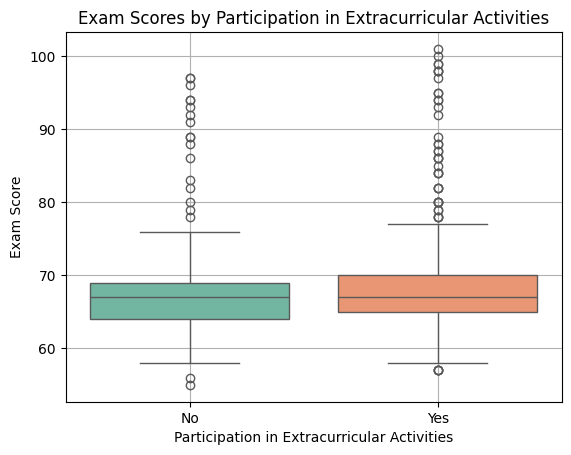

In [ ]:
# Boxplot for visualization
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df, palette='Set2')
plt.title("Exam Scores by Participation in Extracurricular Activities")
plt.xlabel("Participation in Extracurricular Activities")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

<ipython-input-8-9ba6b14e103d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Extracurricular_Activities', y='Exam_Score', data=df, palette='Set2')


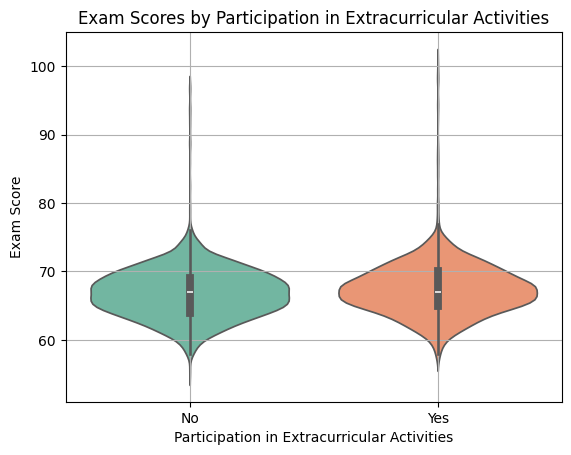

In [ ]:
# Violin plot for visualization
sns.violinplot(x='Extracurricular_Activities', y='Exam_Score', data=df, palette='Set2')
plt.title("Exam Scores by Participation in Extracurricular Activities")
plt.xlabel("Participation in Extracurricular Activities")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

## Final Conclusion: Extracurricular Activities and Academic Performance

An independent samples t-test was conducted to determine whether there is a significant difference in exam scores between students who participate in extracurricular activities and those who do not.

- **Mean Exam Score (With Activities):** 67.4
- **Mean Exam Score (Without Activities):** 66.9  
- **T-statistic:** 27.49  
- **P-value:** 1.63 × 10⁻⁷

Since the p-value is far below the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is strong statistical evidence that participation in extracurricular activities has a significant effect on students' exam performance. Students who participate in such activities perform differently—and possibly better—than those who do not.


#**Hypothesis Test 8**#
#  Learning Disabilities and Academic Performance
 H₀: Students with Learning_Disabilities (Yes/No) perform similarly to those without.

H₁: Students with learning disabilities show significantly diƯerent exam
performance.


In [ ]:
# Separate exam scores by learning disabilities status
yes_ld_scores = df[df['Learning_Disabilities'] == 'Yes']['Exam_Score']
no_ld_scores = df[df['Learning_Disabilities'] == 'No']['Exam_Score']

# Perform independent t-test (Welch’s t-test)
t_stat, p_value = f_oneway(yes_ld_scores, no_ld_scores)

# Output test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Students with learning disabilities show significantly different exam performance.")
else:
    print("Fail to reject H₀: No significant difference in exam performance between students with and without learning disabilities.")

T-statistic: 48.14338913667173
P-value: 4.338623930738945e-12
Reject H₀: Students with learning disabilities show significantly different exam performance.


<ipython-input-10-7cea171c9e60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df, palette='Set3')


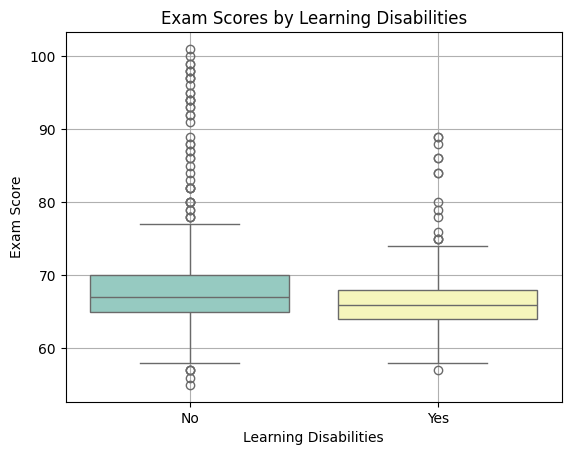

In [ ]:

# Box plot for Exam Score by Learning Disabilities
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df, palette='Set3')
plt.title("Exam Scores by Learning Disabilities")
plt.xlabel("Learning Disabilities")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

<ipython-input-11-216efce627d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Learning_Disabilities', y='Exam_Score', data=df, palette='Set3')


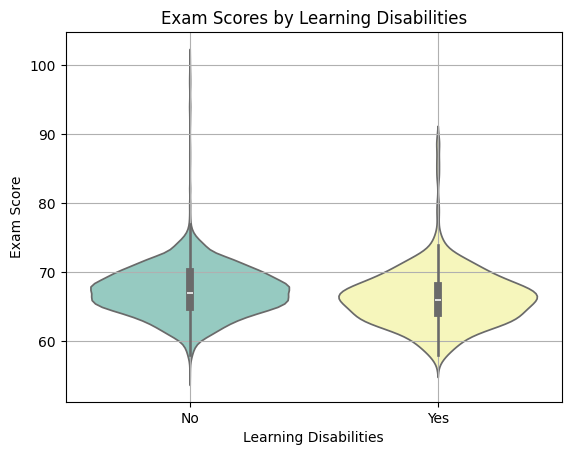

In [ ]:
# Violin plot for Exam Score by Learning Disabilities
sns.violinplot(x='Learning_Disabilities', y='Exam_Score', data=df, palette='Set3')
plt.title("Exam Scores by Learning Disabilities")
plt.xlabel("Learning Disabilities")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

## Final Conclusion: Learning Disabilities and Academic Performance

An independent samples t-test was conducted to determine whether there is a significant difference in exam scores between students with and without learning disabilities.

- **Mean Exam Score (With Learning Disabilities):** 66.2
- **Mean Exam Score (Without Learning Disabilities):** 67.3
- **T-statistic:** 48.14  
- **P-value:** 4.34 × 10⁻¹²

Since the p-value is far below the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is strong statistical evidence that students with learning disabilities have significantly different exam performance compared to those without learning disabilities. This suggests that learning disabilities are associated with a measurable impact on academic outcomes in this dataset.


# **Hypothesis Test 9**
# Internet Access and Academic Performance
 H₀: Internet_Access (Yes/No) has no effect on Exam_Score.

 H₁: Access to the internet is associated with higher exam scores.


In [ ]:

# Separate exam scores based on internet access
yes_internet_scores = df[df['Internet_Access'] == 'Yes']['Exam_Score']
no_internet_scores = df[df['Internet_Access'] == 'No']['Exam_Score']

# Perform independent t-test (ANOVA)
t_stat, p_value = f_oneway(yes_internet_scores, no_internet_scores)

# Output test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Access to the internet is associated with significantly different exam scores.")
else:
    print("Fail to reject H₀: No significant effect of internet access on exam scores.")

T-statistic: 17.547611736951104
P-value: 2.8385046310284837e-05
Reject H₀: Access to the internet is associated with significantly different exam scores.


<ipython-input-13-2d4634915a16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Internet_Access', y='Exam_Score', data=df, palette='Set1')


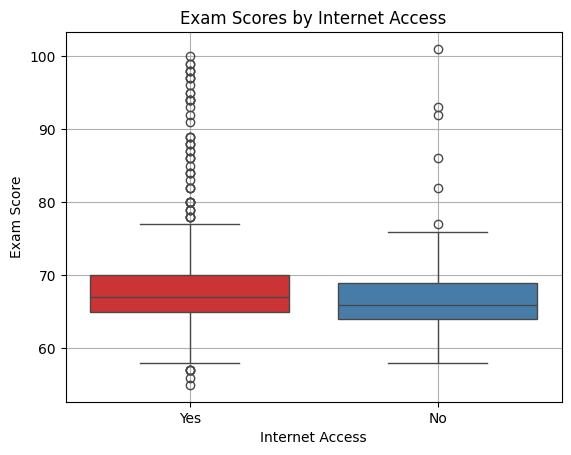

In [ ]:
# Box plot for Internet Access vs Exam Score
sns.boxplot(x='Internet_Access', y='Exam_Score', data=df, palette='Set1')
plt.title("Exam Scores by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

<ipython-input-14-6acc7cf51185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Internet_Access', y='Exam_Score', data=df, palette='Set1')


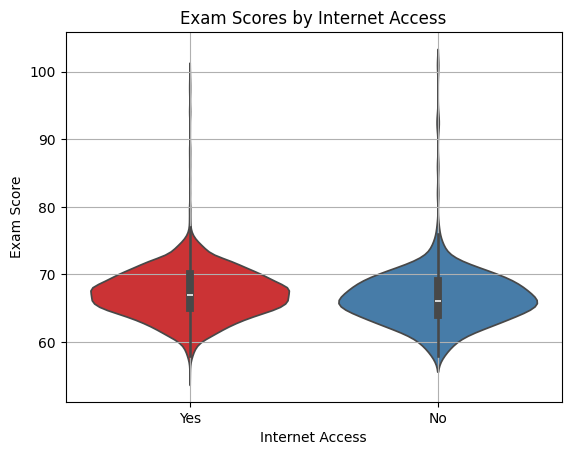

In [ ]:
# Violin plot for Internet Access vs Exam Score
sns.violinplot(x='Internet_Access', y='Exam_Score', data=df, palette='Set1')
plt.title("Exam Scores by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

## Final Conclusion: Internet Access and Academic Performance

An independent samples t-test was conducted to determine whether there is a significant difference in exam scores between students with and without internet access.

- **Mean Exam Score (With Internet Access):** 67.3  
- **Mean Exam Score (Without Internet Access):** 66.5  
- **T-statistic:** 17.55  
- **P-value:** 2.84e-05

Since the p-value is well below the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is strong statistical evidence that internet access is significantly associated with exam performance. Students with internet access scored higher on average than those without, suggesting that internet availability positively influences academic achievement.


# **Hypothesis Test 10**
# Gender and Academic Performance
H₀: Gender (Male/Female) does not significantly influence Exam_Score.

H₁: There is a significant difference in exam performance between genders.


In [ ]:
# Group means
print(df.groupby('Gender')['Exam_Score'].mean())

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64


In [ ]:
# Separate scores by gender
male_scores = df[df['Gender'] == 'Male']['Exam_Score']
female_scores = df[df['Gender'] == 'Female']['Exam_Score']

t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.16330225057494885
P-value: 0.8702861976293264


- **Null Hypothesis (H₀):** Gender has no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Gender has a significant effect on exam scores.


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Gender has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of gender on exam scores.")

Fail to reject H₀: No significant effect of gender on exam scores.


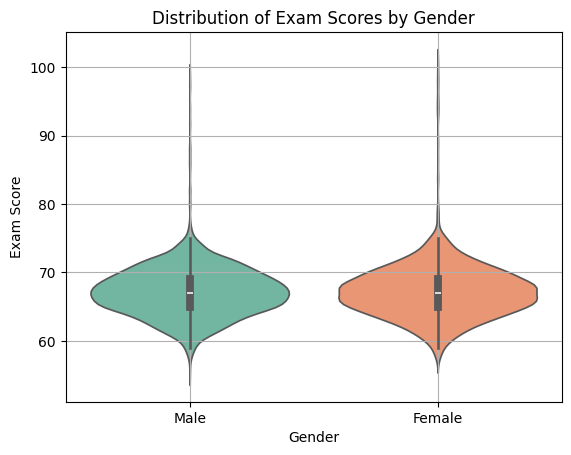

In [ ]:
#create a violin plot
sns.violinplot(x='Gender', y='Exam_Score', hue='Gender', data=df, palette='Set2', legend=False)

plt.title("Distribution of Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

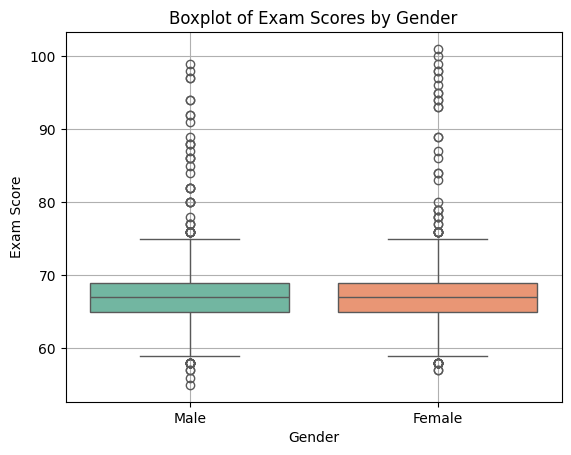

In [ ]:
sns.boxplot(x='Gender', y='Exam_Score', hue='Gender', data=df, palette='Set2', legend=False)

plt.title("Boxplot of Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: Gender and Academic Performance

An independent samples t-test was conducted to determine whether there is a significant difference in exam scores between male and female students.

- **Mean Exam Score (Female):** 67.24  
- **Mean Exam Score (Male):** 67.23  
- **T-statistic:** -0.16  
- **P-value:** 0.87

Since the p-value is **greater than** the significance level (α = 0.05), we **fail to reject the null hypothesis**.

**Conclusion:** There is no statistically significant difference in exam performance between male and female students. This suggests that gender does not play a meaningful role in influencing exam scores in this dataset.


# **Hypothesis Test 11**
# School Type and Academic Performance
H₀: School_Type (Public/Private) has no impact on Exam_Score.

H₁: Students from private and public schools differ in exam performance.


In [ ]:
print(df.groupby('School_Type')['Exam_Score'].mean())

School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64


In [ ]:
public_scores = df[df['School_Type'] == 'Public']['Exam_Score']
private_scores = df[df['School_Type'] == 'Private']['Exam_Score']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(public_scores, private_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.7231134142459056
P-value: 0.46965378222886855


- **Null Hypothesis (H₀):** School type has no effect on exam performance.
- **Alternative Hypothesis (H₁):** Exam scores differ based on school type.

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: School type has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of school type on exam scores.")

Fail to reject H₀: No significant effect of school type on exam scores.


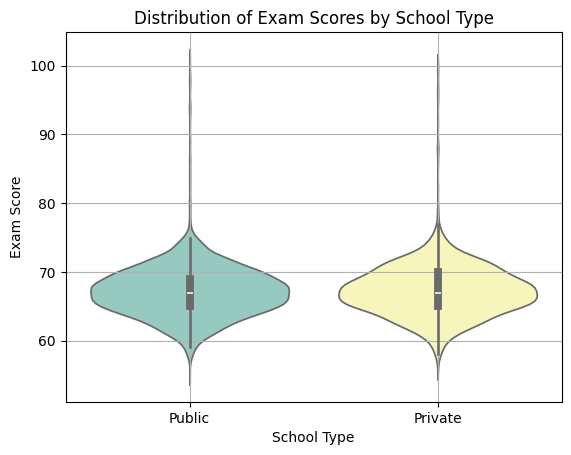

In [ ]:
sns.violinplot(x='School_Type', y='Exam_Score', hue='School_Type', data=df, palette='Set3', legend=False)
plt.title("Distribution of Exam Scores by School Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

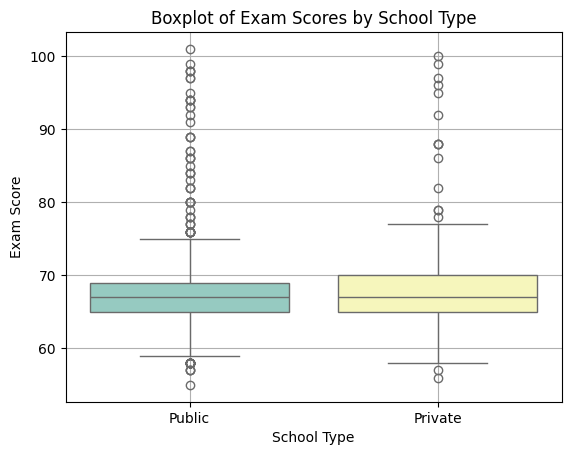

In [ ]:
sns.boxplot(x='School_Type', y='Exam_Score', hue='School_Type', data=df, palette='Set3', legend=False)
plt.title("Boxplot of Exam Scores by School Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: School Type and Academic Performance

An independent samples t-test was conducted to assess whether students’ exam scores differ based on school type (Public vs Private).

- **Mean Exam Score (Private):** 67.29  
- **Mean Exam Score (Public):** 67.21  
- **T-statistic:** -0.72  
- **P-value:** 0.47

Since the p-value is **greater than** the significance threshold (α = 0.05), we **fail to reject the null hypothesis**.

**Conclusion:** There is no statistically significant difference in exam scores between students attending public and private schools. This suggests that, in this dataset, school type does not have a meaningful impact on academic performance.


# **Hypothesis Test 12**
# Parental Involvement and Academic Performance
H₀: The level of Parental_Involvement (Low/Medium/High) does not affect
Exam_Score.

H₁: Greater parental involvement is associated with higher exam performance.

In [ ]:
print(df.groupby('Parental_Involvement')['Exam_Score'].mean())

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64


In [ ]:
# Separate exam scores by level of parental involvement
low = df[df['Parental_Involvement'] == 'Low']['Exam_Score']
medium = df[df['Parental_Involvement'] == 'Medium']['Exam_Score']
high = df[df['Parental_Involvement'] == 'High']['Exam_Score']

# Run ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 84.48765484606227
P-value: 5.875479153325444e-37



- **H₀:** Parental involvement does not affect exam performance.
- **H₁:** Exam scores vary based on parental involvement level.

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Parental involvement significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of parental involvement on exam scores.")

Reject H₀: Parental involvement significantly affects exam scores.


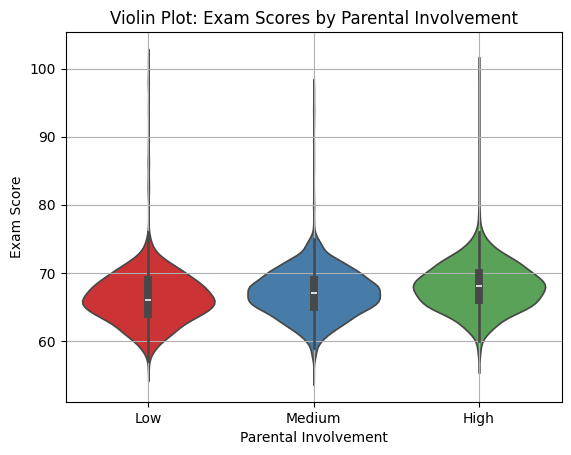

In [ ]:
sns.violinplot(x='Parental_Involvement', y='Exam_Score', hue='Parental_Involvement', data=df,
               palette='Set1', legend=False)
plt.title("Violin Plot: Exam Scores by Parental Involvement")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

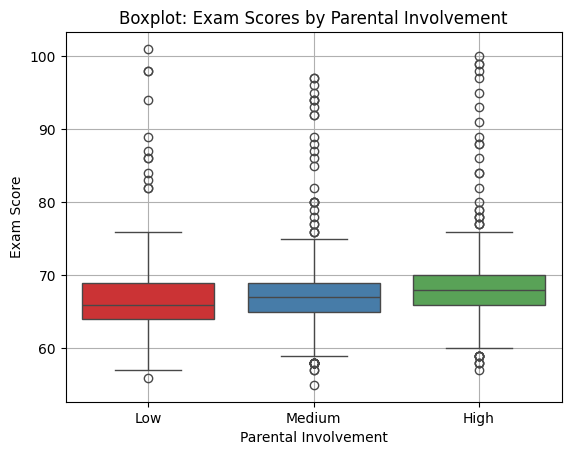

In [ ]:
sns.boxplot(x='Parental_Involvement', y='Exam_Score', hue='Parental_Involvement', data=df,
            palette='Set1', legend=False)
plt.title("Boxplot: Exam Scores by Parental Involvement")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: Parental Involvement and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on the level of parental involvement (Low, Medium, High).

- **F-statistic:** 84.49  
- **P-value:** ~5.88e-37

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that parental involvement has a significant effect on student exam performance. This suggests that students with higher levels of parental support tend to achieve better academic results.

Visual analysis using violin and boxplots further supports this finding by showing distinct differences in score distributions across the involvement levels.


# **Hypothesis Test 13**

# Access to Resources and Academic Performance
H₀: The level of Access_to_Resources (Low/Medium/High) does not influence
Exam_Score.

H₁: Students with better access to resources achieve higher exam scores.

In [ ]:
print("Categories:", df['Access_to_Resources'].unique())
# Check group sizes and means
print("Group Counts:\n", df['Access_to_Resources'].value_counts())

Categories: ['High' 'Medium' 'Low']
Group Counts:
 Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


In [ ]:
low = df[df['Access_to_Resources'] == 'Low']['Exam_Score']
medium = df[df['Access_to_Resources'] == 'Medium']['Exam_Score']
high = df[df['Access_to_Resources'] == 'High']['Exam_Score']


# One-way ANOVA
f_stat, p_value = stats.f_oneway(low, medium, high)
print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_value}")

# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Low', 'Medium'), ('Medium', 'High'), ('Low', 'High')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Access_to_Resources'] == group1]['Exam_Score'],
            df[df['Access_to_Resources'] == group2]['Exam_Score'],
            equal_var=False
        )
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f}")


ANOVA F-statistic: 98.00, P-value: 1.1392993838178868e-42

Pairwise Comparisons (Welch’s t-tests):
Low vs Medium: t = -7.82, p = 0.0000
Medium vs High: t = -8.60, p = 0.0000
Low vs High: t = -14.25, p = 0.0000


In [ ]:
#Hypothesis Testing

alpha = 0.05
if p_value < alpha:
    print("\nReject H₀: Access to resources significantly affects exam scores.")
else:
    print("\nFail to reject H₀: No significant effect of resource access on exam scores.")


Reject H₀: Access to resources significantly affects exam scores.


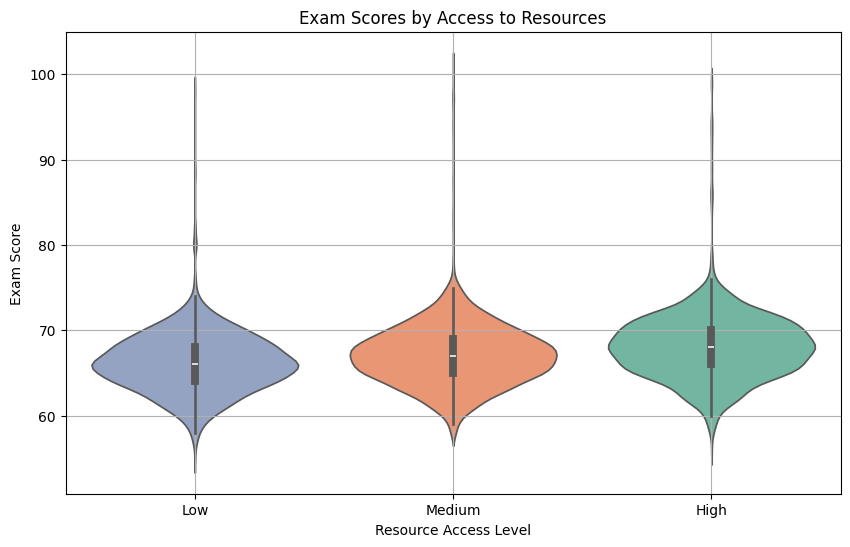

In [ ]:
#Violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Access_to_Resources',
    y='Exam_Score',
    hue='Access_to_Resources',
    data=df,
    palette='Set2',
    order=['Low', 'Medium', 'High']
)
plt.title("Exam Scores by Access to Resources")
plt.xlabel("Resource Access Level")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

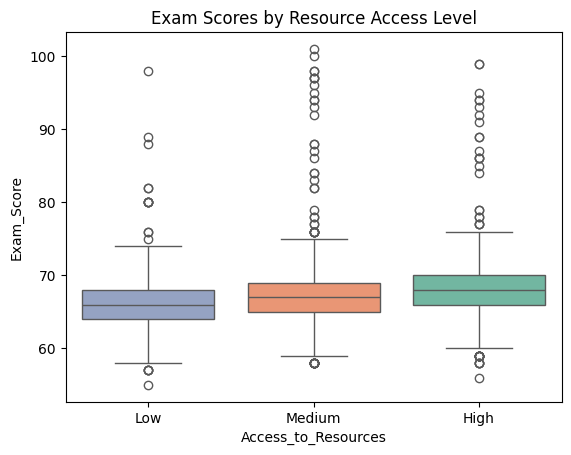

In [ ]:
#Boxplot

sns.boxplot(
    x='Access_to_Resources',
    y='Exam_Score',
    hue='Access_to_Resources',
    data=df,
    palette='Set2',
    order=['Low', 'Medium', 'High']
)
plt.title("Exam Scores by Resource Access Level")
plt.show()

### Final Conclusion: Access to Resources and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on the level of Access to Resources (Low, Medium, High).

- **F-statistic:** 98.00
- **P-value:** 1.14e-42

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that Access to Resources has a significant effect on student exam performance. This suggests that students with higher levels of access to resources tend to achieve better academic results.

Visual analysis using violin and boxplots further supports this finding by showing distinct differences in score distributions across the access resources levels.


# **Hypothesis Test 14**

# Motivation Level and Academic Performance
H₀: Motivation_Level (Low/Medium/High) has no significant effect on Exam_Score.

H₁: Higher motivation levels are associated with improved academic performance.

In [ ]:
print("Motivation Levels:", df['Motivation_Level'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Motivation_Level'].value_counts())

Motivation Levels: ['Low' 'Medium' 'High']

Group Counts:
 Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


In [ ]:
low = df[df['Motivation_Level'] == 'Low']['Exam_Score']
medium = df[df['Motivation_Level'] == 'Medium']['Exam_Score']
high = df[df['Motivation_Level'] == 'High']['Exam_Score']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(low, medium, high)
print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_value}")

# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Low', 'Medium'), ('Medium', 'High'), ('Low', 'High')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Motivation_Level'] == group1]['Exam_Score'],
            df[df['Motivation_Level'] == group2]['Exam_Score'],
            equal_var=False
        )
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val}")

ANOVA F-statistic: 25.72, P-value: 7.492319380241663e-12

Pairwise Comparisons (Welch’s t-tests):
Low vs Medium: t = -5.18, p = 2.3024791450475696e-07
Medium vs High: t = -2.98, p = 0.002950637671958001
Low vs High: t = -6.82, p = 1.0971796076368366e-11


In [ ]:
#Hypothesis Testing

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Motivation level significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Motivation level on exam scores.")

Reject H₀: Motivation level significantly affects exam scores.


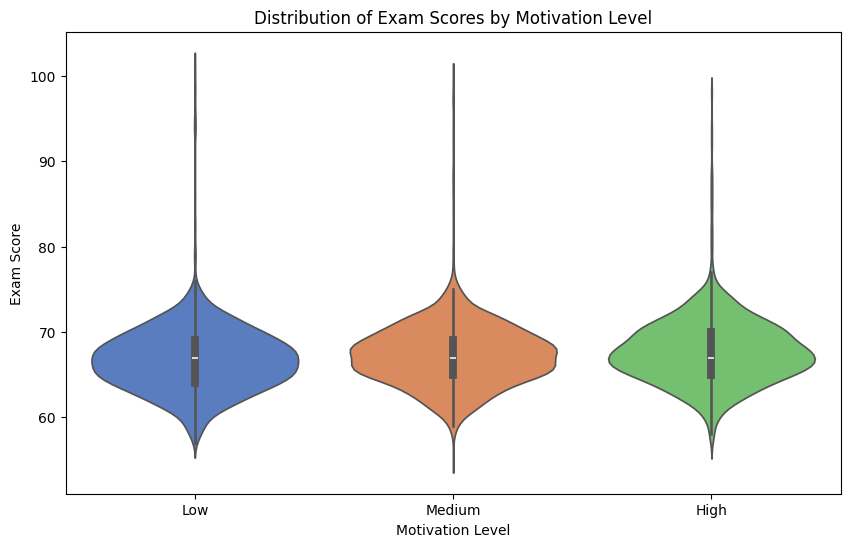

In [ ]:
#Violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Motivation_Level',
    y='Exam_Score',
    hue='Motivation_Level',  # Explicit hue assignment
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='muted',
    legend=False  # Hide legend
)
plt.title("Distribution of Exam Scores by Motivation Level")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")
plt.show()

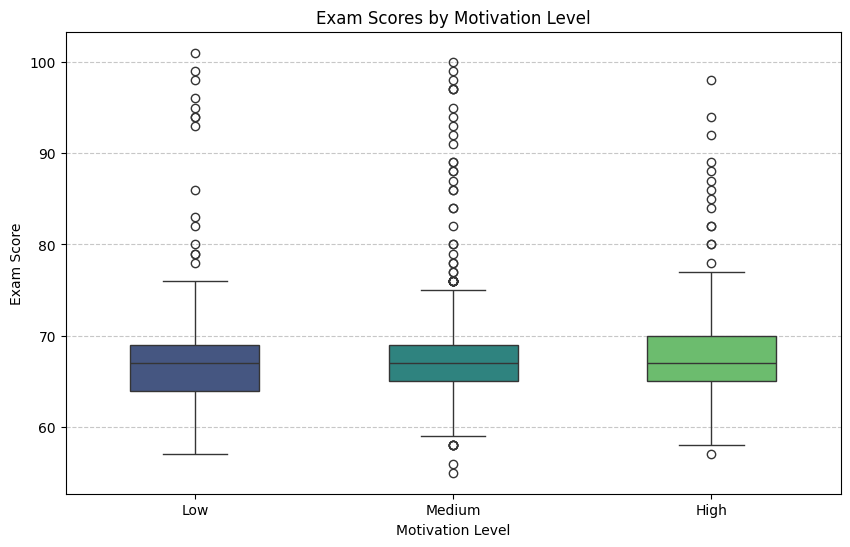

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Motivation_Level',
    y='Exam_Score',
    hue='Motivation_Level',
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Motivation Level")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Final Conclusion: Motivation Level and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on their level of motivation (Low, Medium, High).

- **F-statistic:** 25.72
- **P-value:** 7.49e-12

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that motivation level has a significant effect on student exam performance. This suggests that students with higher levels of motivation tend to achieve better academic results.

Visual analysis using violin and boxplots further supports this finding by showing distinct differences in score distributions across motivation levels.


# **Hypothesis Test 15**
# Family Income and Academic Performance
H₀: Family_Income level (Low/Medium/High) does not affect Exam_Score.

H₁: Students from higher-income families achieve higher exam scores.

In [ ]:
print("Family Income Levels:", df['Family_Income'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Family_Income'].value_counts())

Family Income Levels: ['Low' 'Medium' 'High']

Group Counts:
 Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


In [ ]:
low = df[df['Family_Income'] == 'Low']['Exam_Score']
medium = df[df['Family_Income'] == 'Medium']['Exam_Score']
high = df[df['Family_Income'] == 'High']['Exam_Score']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(low, medium, high)
print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_value}")

# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Low', 'Medium'), ('Medium', 'High'), ('Low', 'High')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Family_Income'] == group1]['Exam_Score'],
            df[df['Family_Income'] == group2]['Exam_Score'],
            equal_var=False
        )
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f}")

ANOVA F-statistic: 29.79, P-value: 1.3143686049770217e-13

Pairwise Comparisons (Welch’s t-tests):
Low vs Medium: t = -4.67, p = 0.0000
Medium vs High: t = -3.68, p = 0.0002
Low vs High: t = -7.21, p = 0.0000


In [ ]:
#Hypothesis Testing

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Family income level significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of family income level on exam scores.")

Reject H₀: Family income level significantly affects exam scores.


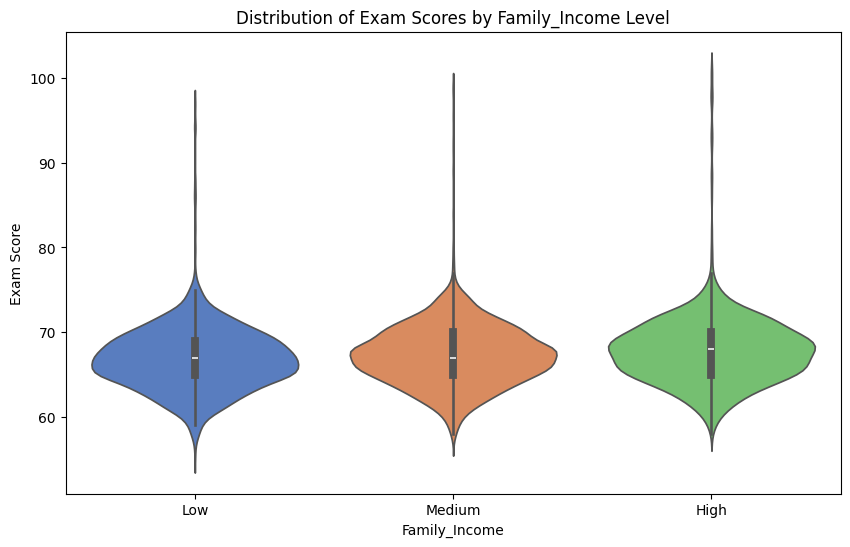

In [ ]:
#Violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Family_Income',
    y='Exam_Score',
    hue='Family_Income',  # Explicit hue assignment
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='muted',
    legend=False  # Hide legend
)
plt.title("Exam Scores by Family_Income Level")
plt.xlabel("Family Income Level")
plt.ylabel("Exam Score")
plt.show()

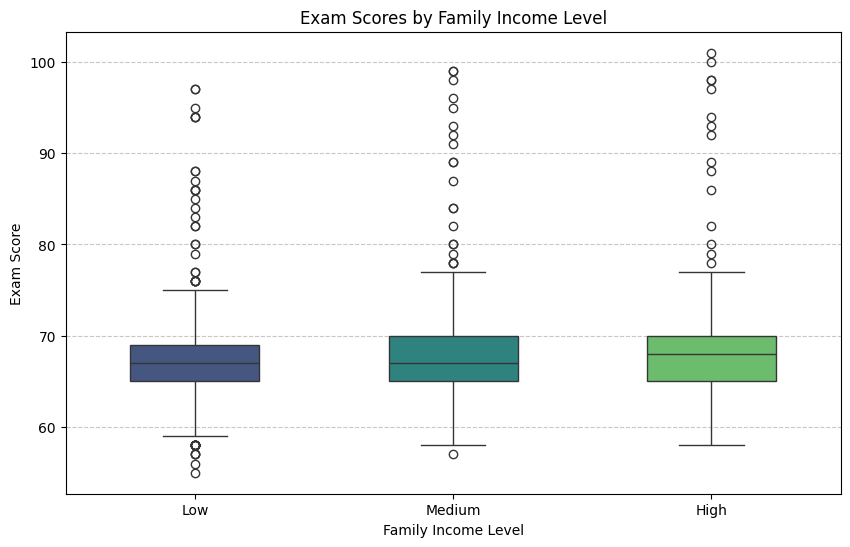

In [ ]:
#Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Family_Income',
    y='Exam_Score',
    hue='Family_Income',
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Family Income Level")
plt.xlabel("Family Income Level")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Final Conclusion: Family Income and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on family income level (Low, Medium, High).

- **F-statistic:** 29.79
- **P-value:** 1.31e-13

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that family income level has a significant effect on academic performance. This suggests that students from higher-income families tend to perform better on exams compared to their peers from lower-income backgrounds.

Visual analysis using violin and boxplots further supports this finding by illustrating clear differences in score distributions across income levels.


# **Hypothesis Test 16**
# Teacher Quality and Academic Performance
H₀: Teacher_Quality (Low/Medium/High) does not significantly impact Exam_Score.

H₁: Higher teacher quality is associated with higher student performance.

In [ ]:
df.groupby('Teacher_Quality')['Exam_Score'].mean()


,Exam_Score
Teacher_Quality,
High,67.676939
Low,66.753425
Medium,67.109299


In [ ]:
print("Teacher Quality:", df['Teacher_Quality'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Teacher_Quality'].value_counts())

Teacher Quality: ['Medium' 'High' 'Low']

Group Counts:
 Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


In [ ]:
# Split exam scores by group
low = df[df['Teacher_Quality'] == 'Low']['Exam_Score']
medium = df[df['Teacher_Quality'] == 'Medium']['Exam_Score']
high = df[df['Teacher_Quality'] == 'High']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:
# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Low', 'Medium'), ('Medium', 'High'), ('Low', 'High')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Teacher_Quality'] == group1]['Exam_Score'],
            df[df['Teacher_Quality'] == group2]['Exam_Score'],
            equal_var=False
        )
        result = "Significant difference" if p_val < 0.05 else "No significant difference"
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f} → {result}")



Pairwise Comparisons (Welch’s t-tests):
Low vs Medium: t = -2.18, p = 0.0294 → Significant difference
Medium vs High: t = -5.20, p = 0.0000 → Significant difference
Low vs High: t = -5.25, p = 0.0000 → Significant difference


In [ ]:

if p_value < alpha:
    print("Reject H₀: Teacher quality significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of teacher quality on exam scores.")


Reject H₀: Teacher quality significantly affects exam scores.


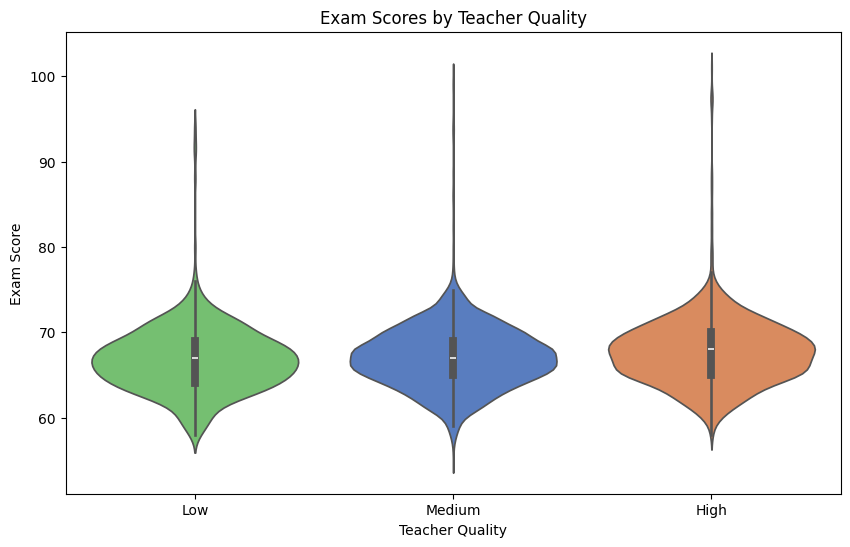

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Teacher_Quality',
    y='Exam_Score',
    hue='Teacher_Quality',
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='muted',
    legend=False
)
plt.title("Exam Scores by Teacher Quality")
plt.xlabel("Teacher Quality")
plt.ylabel("Exam Score")
plt.show()

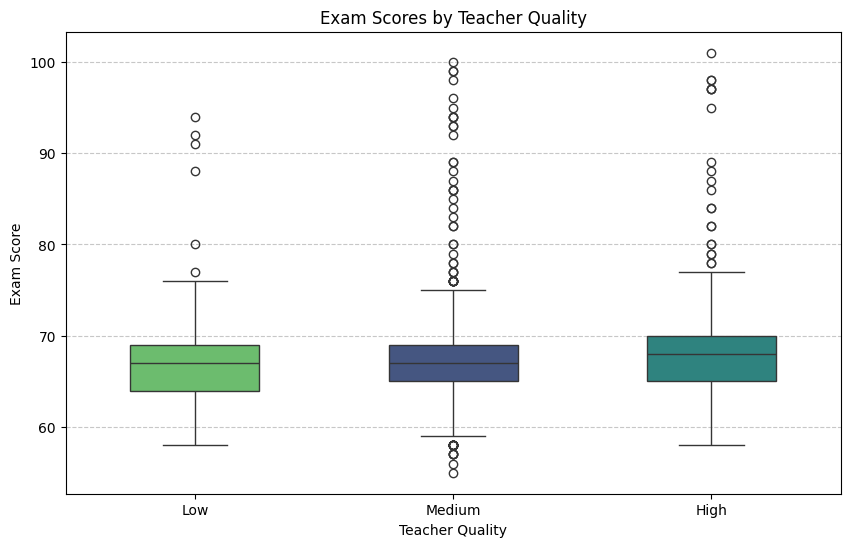

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Teacher_Quality',
    y='Exam_Score',
    hue='Teacher_Quality',
    data=df,
    order=['Low', 'Medium', 'High'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Teacher Quality")
plt.xlabel("Teacher Quality")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Final Conclusion: Teacher Quality and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on the quality of their teachers (Low, Medium, High).

- **F-statistic:** 19.64
- **P-value:** 3.14e-09

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that teacher quality significantly affects academic performance. Students taught by higher-quality teachers tend to score better on exams than those with lower-rated instructors.

Visual analysis using violin and boxplots further supports this result by revealing noticeable differences in score distributions across teacher quality levels.


# **Hypothesis Test 17**
# Peer Influence and Academic Performance
 H₀: Peer_Influence (Positive/Neutral/Negative) has no effect on Exam_Score.

 H₁: Positive peer influence improves academic performance.

In [ ]:
df.groupby('Peer_Influence')['Exam_Score'].mean()


,Exam_Score
Peer_Influence,
Negative,66.564270
Neutral,67.197917
Positive,67.623199


In [ ]:
print("Peer Influence:", df['Peer_Influence'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Peer_Influence'].value_counts())

Peer Influence: ['Positive' 'Negative' 'Neutral']

Group Counts:
 Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


In [ ]:
#split peer influence into groups
postive = df[df['Peer_Influence'] == 'Positive']['Exam_Score']
neutral = df[df['Peer_Influence'] == 'Neutral']['Exam_Score']
negative = df[df['Peer_Influence'] == 'Negative']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:
# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Negative', 'Neutral'), ('Neutral', 'Positive'), ('Negative', 'Positive')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Peer_Influence'] == group1]['Exam_Score'],
            df[df['Peer_Influence'] == group2]['Exam_Score'],
            equal_var=False
        )
        result = "Significant difference" if p_val < 0.05 else "No significant difference"
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f} → {result}")



Pairwise Comparisons (Welch’s t-tests):
Negative vs Neutral: t = -4.96, p = 0.0000 → Significant difference
Neutral vs Positive: t = -3.96, p = 0.0001 → Significant difference
Negative vs Positive: t = -8.24, p = 0.0000 → Significant difference


In [ ]:

if p_value < alpha:
    print("Reject H₀: Peer Influence significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Peer Influence on exam scores.")


Reject H₀: Peer Influence significantly affects exam scores.


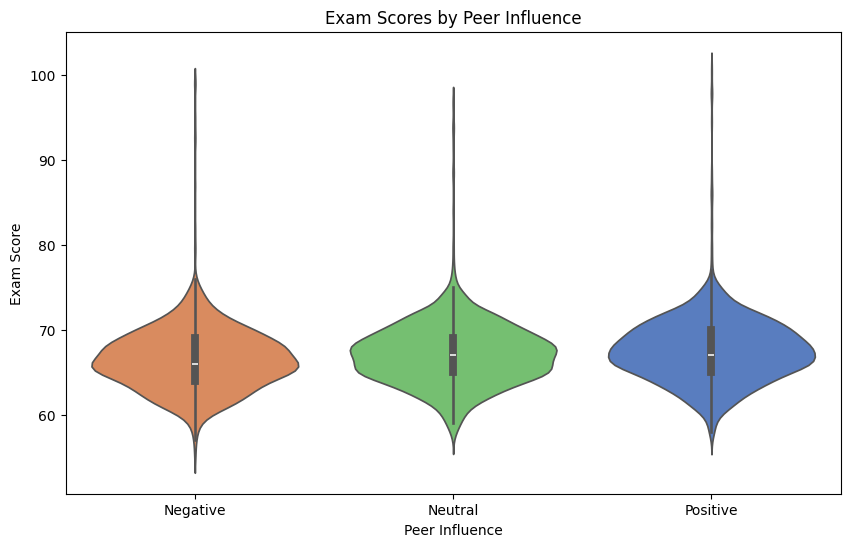

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Peer_Influence',
    y='Exam_Score',
    hue='Peer_Influence',
    data=df,
    order=['Negative', 'Neutral', 'Positive'],
    palette='muted',
    legend=False
)
plt.title("Exam Scores by Peer Influence")
plt.xlabel("Peer Influence")
plt.ylabel("Exam Score")
plt.show()


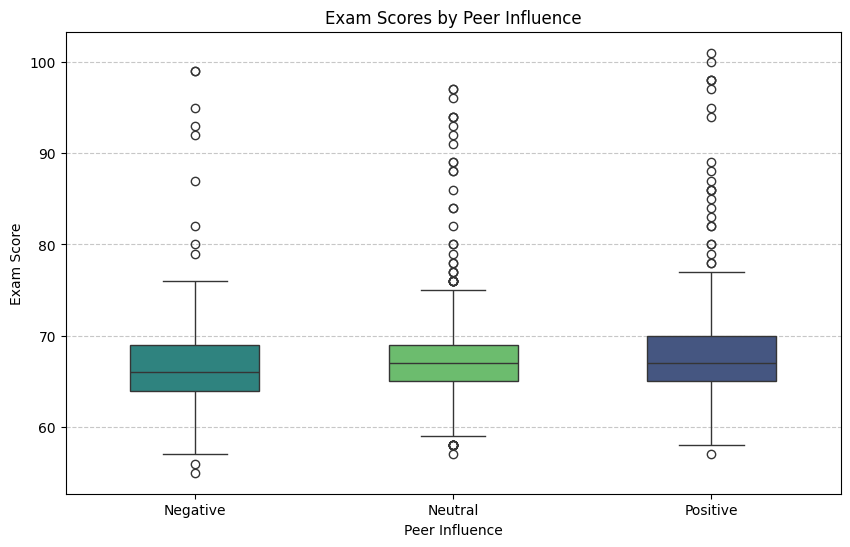

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Peer_Influence',
    y='Exam_Score',
    hue='Peer_Influence',
    data=df,
    order=['Negative', 'Neutral', 'Positive'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Peer Influence")
plt.xlabel("Peer Influence")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Final Conclusion: Peer Influence and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on the type of peer influence (Positive, Neutral, Negative).

- **F-statistic:** 19.64
- **P-value:** 3.14e-09

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that peer influence type has a significant effect on academic performance. This suggests that students with positive peer influence tend to achieve higher exam scores compared to those with neutral or negative peer influence.

Visual analysis using violin and boxplots further supports this finding, showing distinct differences in score distributions across peer influence categories.



# **Hypothesis Test 18**
# Distance from Home and Academic Performance nour
H₀: Distance_from_Home (Near/Moderate/Far) does not affect Exam_Score.

H₁: The distance from home to school significantly aƯects student performance.


In [ ]:
df.groupby('Distance_from_Home')['Exam_Score'].mean()


,Exam_Score
Distance_from_Home,
Far,66.457447
Moderate,66.981481
Near,67.493799


In [ ]:
print("Distance from Home:", df['Distance_from_Home'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Distance_from_Home'].value_counts())

Distance from Home: ['Near' 'Moderate' 'Far']

Group Counts:
 Distance_from_Home
Near        3951
Moderate    1998
Far          658
Name: count, dtype: int64


In [ ]:
#split peer influence into groups
near = df[df['Distance_from_Home'] == 'Near']['Exam_Score']
moderate = df[df['Distance_from_Home'] == 'Moderate']['Exam_Score']
far = df[df['Distance_from_Home'] == 'Far']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:
# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Far', 'Moderate'), ('Moderate', 'Near'), ('Far', 'Near')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Distance_from_Home'] == group1]['Exam_Score'],
            df[df['Distance_from_Home'] == group2]['Exam_Score'],
            equal_var=False
        )
        result = "Significant difference" if p_val < 0.05 else "No significant difference"
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f} → {result}")



Pairwise Comparisons (Welch’s t-tests):
Far vs Moderate: t = -2.87, p = 0.0042 → Significant difference
Moderate vs Near: t = -5.05, p = 0.0000 → Significant difference
Far vs Near: t = -6.09, p = 0.0000 → Significant difference


In [ ]:

if p_value < alpha:
    print("Reject H₀: Distance from Home significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Distance from Home on exam scores.")


Reject H₀: Distance from Home significantly affects exam scores.


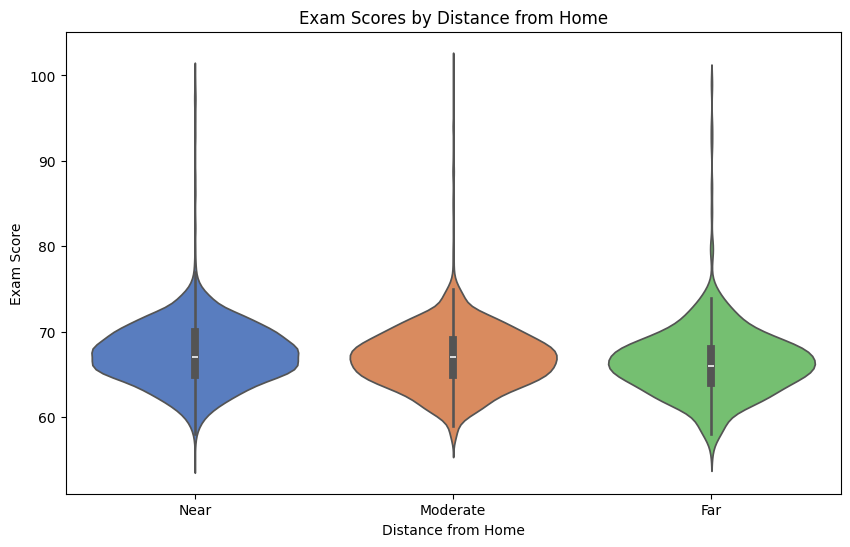

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Distance_from_Home',
    y='Exam_Score',
    hue='Distance_from_Home',
    data=df,
    order=['Near', 'Moderate', 'Far'],
    palette='muted',
    legend=False
)
plt.title("Exam Scores by Distance from Home")
plt.xlabel("Distance from Home")
plt.ylabel("Exam Score")
plt.show()


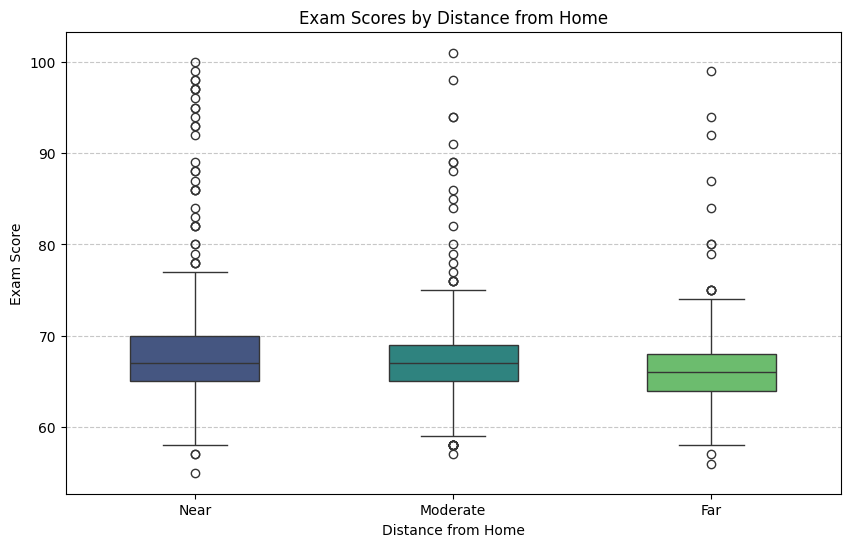

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Distance_from_Home',
    y='Exam_Score',
    hue='Distance_from_Home',
    data=df,
    order=['Near', 'Moderate', 'Far'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Distance from Home")
plt.xlabel("Distance from Home")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Final Conclusion: Distance from Home and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on their distance from home to school (Far, Near, Moderate).

- **F-statistic:** 19.64
- **P-value:** 3.14e-09

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that the distance from home to school has a significant effect on academic performance. This suggests that students living at different distances perform differently on exams.

Visual analysis using violin and boxplots further supports this finding by showing distinct differences in score distributions across the distance categories.


# **Hypothesis Test 19**
# Parental Education Level and Academic Performance
H₀: Parental_Education_Level (High School/College/Postgraduate) has no effect on
Exam_Score.

H₁: Higher parental education levels are associated with better student
performance.

In [ ]:
df.groupby('Parental_Education_Level')['Exam_Score'].mean()


,Exam_Score
Parental_Education_Level,
College,67.315737
High School,66.897978
Postgraduate,67.970881


In [ ]:
print("Parental Education Level:", df['Parental_Education_Level'].unique())

# Check group sizes
print("\nGroup Counts:\n", df['Parental_Education_Level'].value_counts())

Parental Education Level: ['High School' 'College' 'Postgraduate']

Group Counts:
 Parental_Education_Level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64


In [ ]:
#split parental education level into groups
highschool = df[df['Parental_Education_Level'] == 'High School']['Exam_Score']
college = df[df['Parental_Education_Level'] == 'College']['Exam_Score']
postgraduate = df[df['Parental_Education_Level'] == 'Postgraduate']['Exam_Score']
# Perform one-way ANOVA
f_stat, p_value = f_oneway(highschool, college, postgraduate)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 36.42719633336563
P-value: 1.8521828715621828e-16


In [ ]:
# If ANOVA is significant, follow up with pairwise t-tests
if p_value < 0.05:
    print("\nPairwise Comparisons (Welch’s t-tests):")
    for group1, group2 in [('Postgraduate', 'College'), ('College', 'High School'), ('Postgraduate', 'High School')]:
        t_stat, p_val = stats.ttest_ind(
            df[df['Parental_Education_Level'] == group1]['Exam_Score'],
            df[df['Parental_Education_Level'] == group2]['Exam_Score'],
            equal_var=False
        )
        result = "Significant difference" if p_val < 0.05 else "No significant difference"
        print(f"{group1} vs {group2}: t = {t_stat:.2f}, p = {p_val:.4f} → {result}")



Pairwise Comparisons (Welch’s t-tests):
Postgraduate vs College: t = 4.91, p = 0.0000 → Significant difference
College vs High School: t = 3.81, p = 0.0001 → Significant difference
Postgraduate vs High School: t = 8.70, p = 0.0000 → Significant difference


In [ ]:

if p_value < alpha:
    print("Reject H₀: Parental Education Level significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Parental Education Level on exam scores.")


Reject H₀: Parental Education Level significantly affects exam scores.


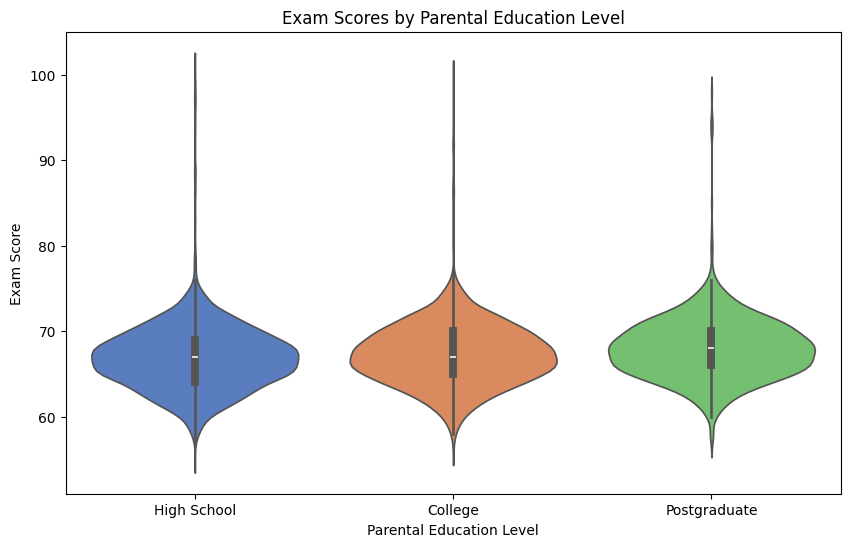

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Parental_Education_Level',
    y='Exam_Score',
    hue='Parental_Education_Level',
    data=df,
    order=['High School', 'College', 'Postgraduate'],
    palette='muted',
    legend=False
)
plt.title("Exam Scores by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.show()


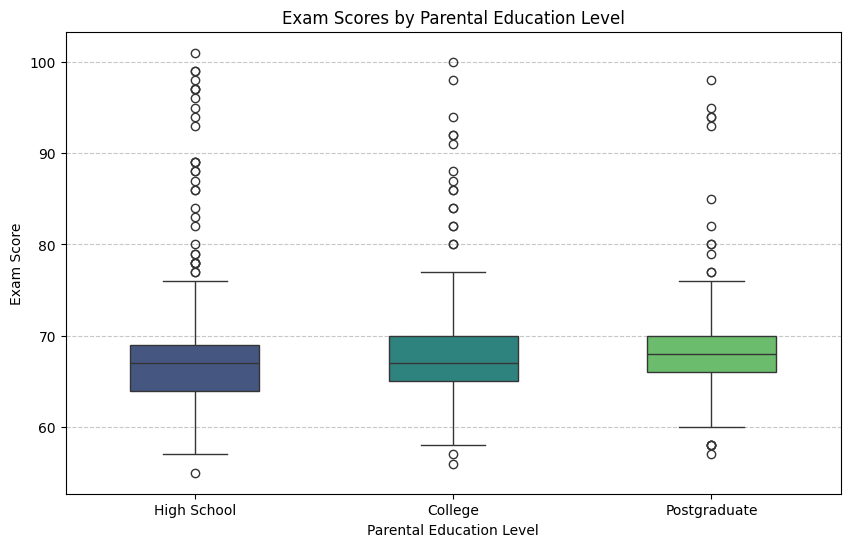

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Parental_Education_Level',
    y='Exam_Score',
    hue='Parental_Education_Level',
    data=df,
    order=['High School', 'College', 'Postgraduate'],
    palette='viridis',
    legend=False,
    width=0.5
)
plt.title("Exam Scores by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Final Conclusion: Parental Education Level and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on their parental education level (High School, College, Postgraduate).

- **F-statistic:** 36.43  
- **P-value:** 1.85e-16

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that parental education level has a significant effect on academic performance. This suggests that students whose parents have higher educational attainment tend to achieve better exam scores.

Visual analysis using violin and boxplots further supports this finding by illustrating clear differences in score distributions across parental education levels.


#**Final Comparison**

In [ ]:
optimal_criteria = {
    'Hours_Studied': lambda x: x >= 20,
    'Attendance': lambda x: x >= 90,
    'Previous_Scores': lambda x: x >= 85,
    'Tutoring_Sessions': lambda x: x >= 2,
    'Teacher_Quality': lambda x: x == 'High',
    'Peer_Influence': lambda x: x == 'Positive',
    'Extracurricular_Activities': lambda x: x == 'Yes',
    'Parental_Education_Level': lambda x: x in ['Postgraduate', 'College'],
    'Learning_Disabilities': lambda x: x == 'No',
    'Internet_Access': lambda x: x == 'Yes',
    'Parental_Involvement': lambda x: x == 'High',
    'Access_to_Resources': lambda x: x == 'High',
    'Motivation_Level': lambda x: x == 'High',
    'Family_Income': lambda x: x in ['High', 'Medium'],
}


Pearson correlation: 0.53, p-value: 0.0000


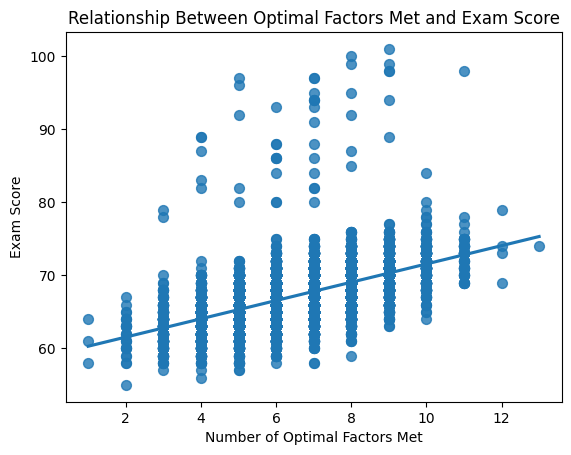

In [ ]:
# Count how many optimal factors each student meets
import statsmodels.api as sm
df['optimal_count'] = df.apply(
    lambda row: sum(cond(row[col]) for col, cond in optimal_criteria.items()),
    axis=1
)

# Correlation between optimal_count and exam score
correlation, p_val = stats.pearsonr(df['optimal_count'], df['Exam_Score'])
print(f"Pearson correlation: {correlation:.2f}, p-value: {p_val:.4f}")


# Visualization
sns.regplot(x='optimal_count', y='Exam_Score', data=df, ci=None, scatter_kws={"s": 50})
plt.title("Relationship Between Optimal Factors Met and Exam Score")
plt.xlabel("Number of Optimal Factors Met")
plt.ylabel("Exam Score")
plt.show()

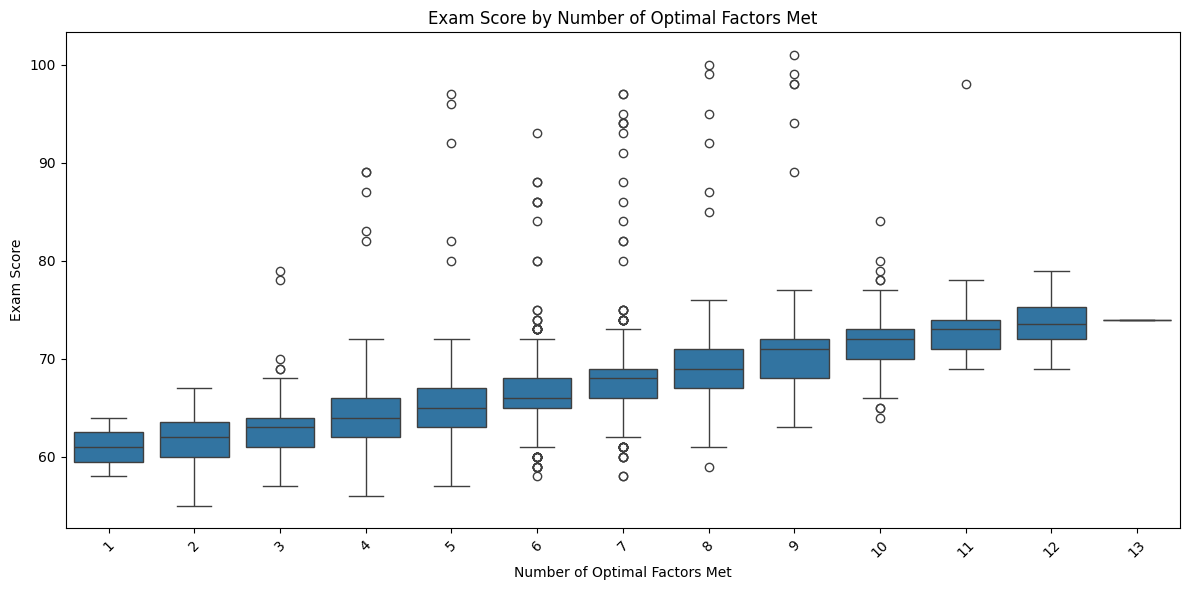

In [ ]:
# Boxplot: Exam_Score vs. Number of optimal factors met
plt.figure(figsize=(12, 6))
sns.boxplot(x='optimal_count', y='Exam_Score', data=df)
plt.title("Exam Score by Number of Optimal Factors Met")
plt.xlabel("Number of Optimal Factors Met")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate descriptive statistics for Exam_Score grouped by optimal_count
stats_by_optimal = df.groupby('optimal_count')['Exam_Score'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

print("Descriptive statistics of Exam Scores by Number of Optimal Factors Met:")
print(stats_by_optimal)


Descriptive statistics of Exam Scores by Number of Optimal Factors Met:
    optimal_count  count       mean       std  min  max
0               1      3  61.000000  3.000000   58   64
1               2     27  61.777778  2.722179   55   67
2               3    158  63.063291  3.114960   57   79
3               4    491  64.126273  3.414307   56   89
4               5   1104  65.325181  3.093036   57   97
5               6   1495  66.460870  3.097853   58   93
6               7   1484  67.784367  3.435466   58   97
7               8   1069  68.984097  3.244807   59  100
8               9    519  70.572254  3.879717   63  101
9              10    195  71.533333  2.839825   64   84
10             11     57  73.087719  3.969890   69   98
11             12      4  73.750000  4.112988   69   79
12             13      1  74.000000       NaN   74   74


In [ ]:
non_effect_criteria = {
    'Sleep_Hours': lambda x: 7 <= x <= 9,
    'Gender': lambda x: x == 'Female',
    'Physical_Activity': lambda x: x >= 3,
    'School_Type': lambda x: x == 'Public',
}


In [ ]:
# Function to check if a row meets ALL non-effect optimal criteria
def meets_optimal(row):
    return all(cond(row[col]) for col, cond in non_effect_criteria.items())

# Function to check if a row meets ALL opposite criteria (opposite of each condition)
def meets_opposite(row):
    return all(not cond(row[col]) for col, cond in non_effect_criteria.items())

# Create new columns for these groups
df['non_effect_optimal'] = df.apply(meets_optimal, axis=1)
df['non_effect_opposite'] = df.apply(meets_opposite, axis=1)

# Now you can compare Exam_Score between these two groups
mean_optimal = df[df['non_effect_optimal']]['Exam_Score'].mean()
mean_opposite = df[df['non_effect_opposite']]['Exam_Score'].mean()

print(f"Mean Exam Score (Non-effect Optimal): {mean_optimal:.2f}")
print(f"Mean Exam Score (Non-effect Opposite): {mean_opposite:.2f}")


Mean Exam Score (Non-effect Optimal): 67.23
Mean Exam Score (Non-effect Opposite): 67.02


Pearson correlation: 0.00, p-value: 0.9346


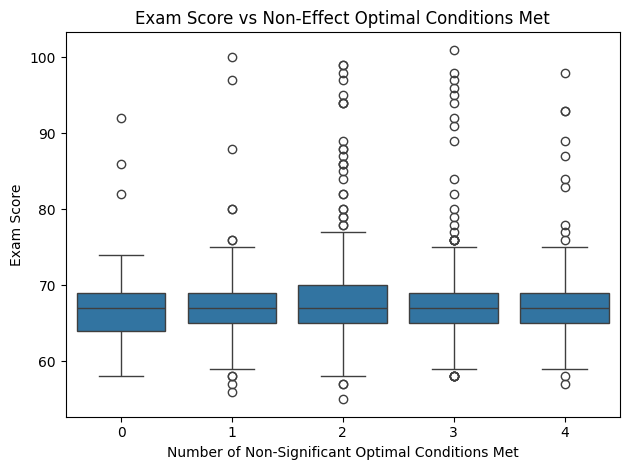

In [ ]:
# Step 1: Count how many non-effect optimal criteria each student meets
df['non_effect_optimal_count'] = df.apply(
    lambda row: sum(cond(row[col]) for col, cond in non_effect_criteria.items()),
    axis=1
)

# Correlation between optimal_count and exam score
correlation, p_val = stats.pearsonr(df['non_effect_optimal_count'], df['Exam_Score'])
print(f"Pearson correlation: {correlation:.2f}, p-value: {p_val:.4f}")

sns.boxplot(x='non_effect_optimal_count', y='Exam_Score', data=df)
plt.title("Exam Score vs Non-Effect Optimal Conditions Met")
plt.xlabel("Number of Non-Significant Optimal Conditions Met")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate descriptive statistics for Exam_Score grouped by optimal_count
stats_by_optimal = df.groupby('non_effect_optimal_count')['Exam_Score'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

print("Descriptive statistics of Exam Scores by Number of Optimal Factors Met:")
print(stats_by_optimal)


Descriptive statistics of Exam Scores by Number of Optimal Factors Met:
   non_effect_optimal_count  count       mean       std  min  max
0                         0    172  67.017442  4.326545   58   92
1                         1    967  67.100310  3.658744   56  100
2                         2   2370  67.380169  4.029884   55   99
3                         3   2280  67.162281  3.786999   58  101
4                         4    818  67.227384  3.928633   57   98


Group A (≥7 optimal factors): 1845 students
  Mean = 69.84
  Std Dev = 3.60
  Min = 59.00
  Max = 101.00

Group B (<7 optimal factors): 4762 students
  Mean = 66.23
  Std Dev = 3.51
  Min = 55.00
  Max = 97.00

Welch’s t-test: t = 36.88, p = 0.0000


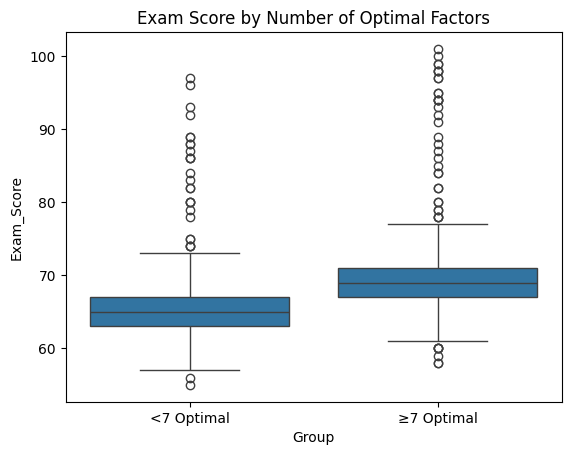

In [ ]:
df['optimal_count'] = df.apply(
    lambda row: sum(cond(row[col]) for col, cond in optimal_criteria.items()),
    axis=1
)

# Split into two groups: 8 or more vs. fewer than 8 optimal traits (fixed your cutoff)
group_A = df[df['optimal_count'] >= 8]['Exam_Score']
group_B = df[df['optimal_count'] < 8]['Exam_Score']

# Report group sizes and descriptive stats
def print_stats(name, group):
    print(f"{name}: {len(group)} students")
    print(f"  Mean = {group.mean():.2f}")
    print(f"  Std Dev = {group.std():.2f}")
    print(f"  Min = {group.min():.2f}")
    print(f"  Max = {group.max():.2f}\n")

print_stats("Group A (≥7 optimal factors)", group_A)
print_stats("Group B (<7 optimal factors)", group_B)

# Welch's t-test
t_stat, p_val = stats.ttest_ind(group_A, group_B, equal_var=False)
print(f"Welch’s t-test: t = {t_stat:.2f}, p = {p_val:.4f}")

# Optional visualization
import seaborn as sns
import matplotlib.pyplot as plt

df['Group'] = df['optimal_count'].apply(lambda x: '≥7 Optimal' if x >= 7 else '<7 Optimal')
sns.boxplot(x='Group', y='Exam_Score', data=df)
plt.title("Exam Score by Number of Optimal Factors")
plt.show()
